Enter job keyword to search (e.g., 'python', 'data analyst'):  'ai'
Enter location (leave blank for all locations):  pakistan


Starting job scraping for ''ai'' in 'pakistan'...
Scraping Indeed page 1: https://www.indeed.com/jobs?q='ai'&l=pakistan&start=0
Error scraping Indeed page 1: 403 Client Error: Forbidden for url: https://www.indeed.com/jobs?q='ai'&l=pakistan&start=0
Scraping Indeed page 2: https://www.indeed.com/jobs?q='ai'&l=pakistan&start=10
Error scraping Indeed page 2: 403 Client Error: Forbidden for url: https://www.indeed.com/jobs?q='ai'&l=pakistan&start=10
Scraping LinkedIn page 1: https://www.linkedin.com/jobs/search/?keywords='ai'&location=pakistan&start=0
Saved 60 jobs to job_listings_'ai'_20250525_033102.csv


,title,company,location,date_posted,skills,description,source,url
0,Associate Software Engineer- AI/ML,Devsinc,"Islamabad, Islāmābād, Pakistan",1 month ago,"python, sql, aws, git, machine learning",We are looking for a highly motivated Associat...,LinkedIn,https://pk.linkedin.com/jobs/view/associate-so...
1,ML Engineer,Fusemachines,"Islamabad, Islāmābād, Pakistan",1 month ago,"python, git, linux, machine learning, pandas",About FusemachinesFusemachines is a 10+ year o...,LinkedIn,https://pk.linkedin.com/jobs/view/ml-engineer-...
2,AI ML Engineer,Next Generation Innovations (NextGENi),"Karachi Division, Sindh, Pakistan",1 month ago,"python, aws",Job DetailsWork Type: HybridEmployment Type: F...,LinkedIn,https://pk.linkedin.com/jobs/view/ai-ml-engine...
3,Associate Software Engineer - AI/ML,Devsinc,"Lahore, Punjab, Pakistan",1 month ago,"python, sql, git, machine learning",Devsincis looking for passionateAssociate Soft...,LinkedIn,https://pk.linkedin.com/jobs/view/associate-so...
4,Team Lead- AI/ML,Devsinc,"Islamabad, Islāmābād, Pakistan",1 month ago,"python, aws, machine learning",We are looking for a highly motivated and expe...,LinkedIn,https://pk.linkedin.com/jobs/view/team-lead-ai...


title
Machine Learning Engineer    6
AI Engineer                  4
AI/ML Engineer               3
AI Software Developer        2
Deep Learning Specialist     2
Name: count, dtype: int64

C:\Users\Saifuddin Hanif\AppData\Local\Temp\ipykernel_15948\2872487547.py:193: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')


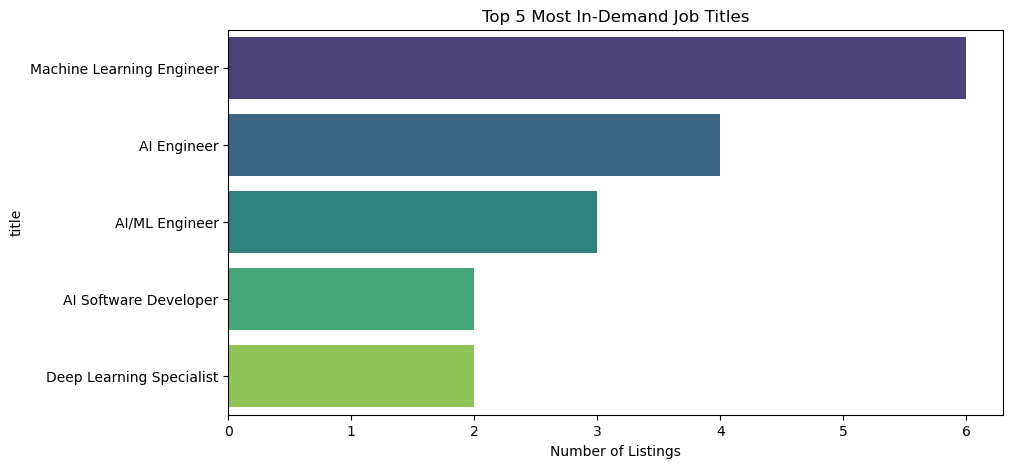

skills
python              36
machine learning    30
                    24
aws                 20
git                 14
sql                 13
pandas              11
docker              10
numpy                9
java                 8
Name: count, dtype: int64

C:\Users\Saifuddin Hanif\AppData\Local\Temp\ipykernel_15948\2872487547.py:205: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='magma')


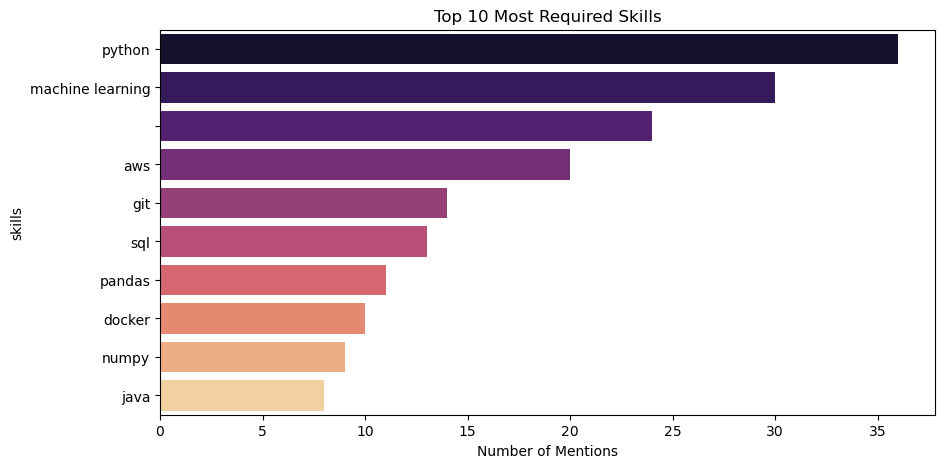

location
Islamabad, Islāmābād, Pakistan       20
Lahore, Punjab, Pakistan             18
Rawalpindi, Punjab, Pakistan         10
Pakistan                              5
Karachi Division, Sindh, Pakistan     4
Name: count, dtype: int64

C:\Users\Saifuddin Hanif\AppData\Local\Temp\ipykernel_15948\2872487547.py:216: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')


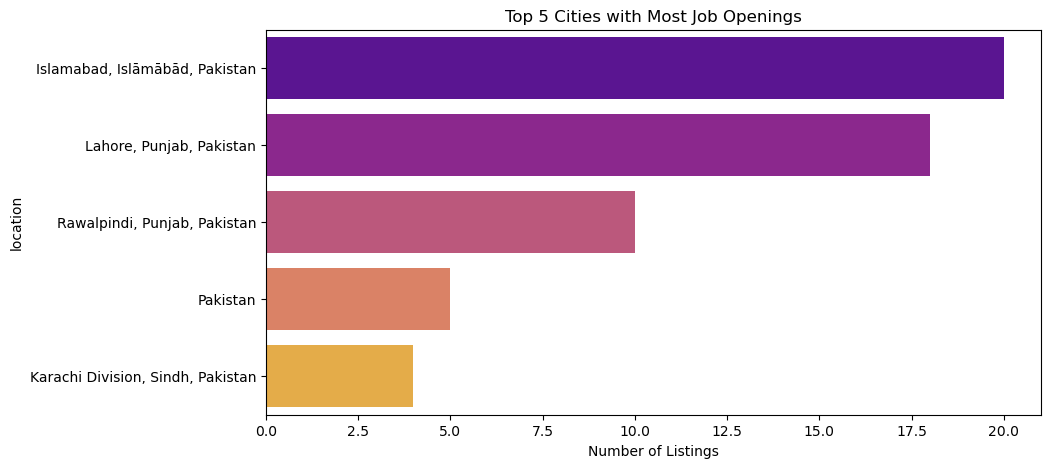

source
LinkedIn    60
Name: count, dtype: int64

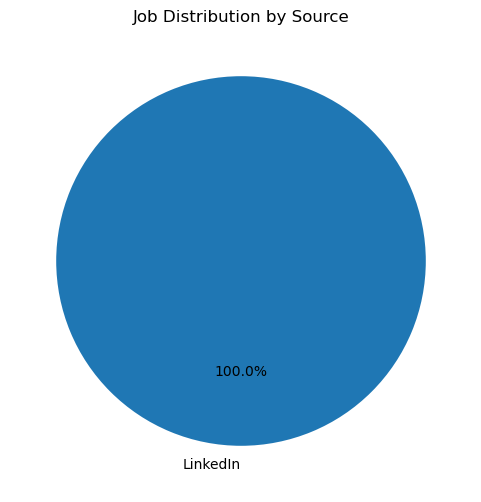

In [29]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Set up headers to mimic a browser visit
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Function to scrape Indeed job listings
def scrape_indeed(keyword="python", location="", num_pages=2):
    base_url = "https://www.indeed.com"
    jobs = []
    
    for page in range(num_pages):
        url = f"{base_url}/jobs?q={keyword}&l={location}&start={page*10}"
        print(f"Scraping Indeed page {page + 1}: {url}")
        
        try:
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')
            
            job_cards = soup.find_all('div', class_='job_seen_beacon')
            
            for card in job_cards:
                title = card.find('h2', class_='jobTitle').get_text(strip=True)
                company = card.find('span', class_='companyName').get_text(strip=True) if card.find('span', class_='companyName') else "N/A"
                location = card.find('div', class_='companyLocation').get_text(strip=True) if card.find('div', class_='companyLocation') else "N/A"
                date_posted = card.find('span', class_='date').get_text(strip=True) if card.find('span', class_='date') else "N/A"
                
                # Get job description URL
                relative_url = card.find('a')['href'] if card.find('a') else None
                if relative_url:
                    job_url = f"{base_url}{relative_url}"
                    
                    # Scrape job description page for skills
                    try:
                        job_response = requests.get(job_url, headers=headers)
                        job_soup = BeautifulSoup(job_response.text, 'html.parser')
                        description = job_soup.find('div', id='jobDescriptionText').get_text(strip=True) if job_soup.find('div', id='jobDescriptionText') else ""
                        
                        # Extract skills from description (simple keyword matching)
                        skills = []
                        tech_skills = ['python', 'java', 'sql', 'javascript', 'aws', 'docker', 'git', 'linux', 
                                       'machine learning', 'data analysis', 'pandas', 'numpy', 'flask', 'django']
                        
                        for skill in tech_skills:
                            if skill in description.lower():
                                skills.append(skill)
                    except Exception as e:
                        description = ""
                        skills = []
                        print(f"Error scraping job description: {e}")
                else:
                    description = ""
                    skills = []
                
                jobs.append({
                    'title': title,
                    'company': company,
                    'location': location,
                    'date_posted': date_posted,
                    'skills': ', '.join(skills),
                    'description': description[:200] + '...' if description else "",
                    'source': 'Indeed',
                    'url': job_url if relative_url else "N/A"
                })
                
            # Random delay to be polite
            time.sleep(random.uniform(1, 3))
            
        except Exception as e:
            print(f"Error scraping Indeed page {page + 1}: {e}")
            continue
    
    return jobs

# Function to scrape LinkedIn job listings (simplified version)
def scrape_linkedin(keyword="python", location="", num_pages=1):
    base_url = "https://www.linkedin.com/jobs/search"
    jobs = []
    
    for page in range(num_pages):
        url = f"{base_url}/?keywords={keyword}&location={location}&start={page*25}"
        print(f"Scraping LinkedIn page {page + 1}: {url}")
        
        try:
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')
            
            job_cards = soup.find_all('div', class_='base-card')
            
            for card in job_cards:
                title = card.find('h3', class_='base-search-card__title').get_text(strip=True) if card.find('h3', class_='base-search-card__title') else "N/A"
                company = card.find('h4', class_='base-search-card__subtitle').get_text(strip=True) if card.find('h4', class_='base-search-card__subtitle') else "N/A"
                location = card.find('span', class_='job-search-card__location').get_text(strip=True) if card.find('span', class_='job-search-card__location') else "N/A"
                date_posted = card.find('time', class_='job-search-card__listdate').get_text(strip=True) if card.find('time', class_='job-search-card__listdate') else "N/A"
                
                # Get job description URL
                relative_url = card.find('a', class_='base-card__full-link')['href'] if card.find('a', class_='base-card__full-link') else None
                if relative_url:
                    job_url = relative_url.split('?')[0]  # Remove query parameters
                    
                    # Scrape job description page for skills
                    try:
                        job_response = requests.get(job_url, headers=headers)
                        job_soup = BeautifulSoup(job_response.text, 'html.parser')
                        description = job_soup.find('div', class_='show-more-less-html__markup').get_text(strip=True) if job_soup.find('div', class_='show-more-less-html__markup') else ""
                        
                        # Extract skills from description
                        skills = []
                        tech_skills = ['python', 'java', 'sql', 'javascript', 'aws', 'docker', 'git', 'linux', 
                                     'machine learning', 'data analysis', 'pandas', 'numpy', 'flask', 'django']
                        
                        for skill in tech_skills:
                            if skill in description.lower():
                                skills.append(skill)
                    except Exception as e:
                        description = ""
                        skills = []
                        print(f"Error scraping job description: {e}")
                else:
                    description = ""
                    skills = []
                
                jobs.append({
                    'title': title,
                    'company': company,
                    'location': location,
                    'date_posted': date_posted,
                    'skills': ', '.join(skills),
                    'description': description[:200] + '...' if description else "",
                    'source': 'LinkedIn',
                    'url': job_url if relative_url else "N/A"
                })
                
            # Random delay to be polite
            time.sleep(random.uniform(2, 4))
            
        except Exception as e:
            print(f"Error scraping LinkedIn page {page + 1}: {e}")
            continue
    
    return jobs

# Main scraping function
def scrape_jobs(keyword="python", location=""):
    print(f"Starting job scraping for '{keyword}' in '{location}'...")
    
    # Scrape from both sources
    indeed_jobs = scrape_indeed(keyword, location)
    linkedin_jobs = scrape_linkedin(keyword, location)
    
    # Combine results
    all_jobs = indeed_jobs + linkedin_jobs
    
    # Create DataFrame
    df = pd.DataFrame(all_jobs)
    
    # Save to CSV
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"job_listings_{keyword}_{timestamp}.csv"
    df.to_csv(filename, index=False)
    print(f"Saved {len(df)} jobs to {filename}")
    
    return df

# Function to analyze and visualize job trends
def analyze_jobs(df):
    if df.empty:
        print("No jobs found to analyze.")
        return
    
    # Display basic info
    display(HTML("<h2>Job Listings Overview</h2>"))
    display(df.head())
    
    # Top 5 job titles
    display(HTML("<h2>Top 5 Most In-Demand Job Titles</h2>"))
    top_titles = df['title'].value_counts().head(5)
    display(top_titles)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
    plt.title('Top 5 Most In-Demand Job Titles')
    plt.xlabel('Number of Listings')
    plt.show()
    
    # Most frequent skills
    display(HTML("<h2>Most Frequent Required Skills</h2>"))
    all_skills = df['skills'].str.split(', ').explode()
    top_skills = all_skills.value_counts().head(10)
    display(top_skills)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_skills.values, y=top_skills.index, palette='magma')
    plt.title('Top 10 Most Required Skills')
    plt.xlabel('Number of Mentions')
    plt.show()
    
    # Top hiring locations
    display(HTML("<h2>Cities with Highest Number of Openings</h2>"))
    top_locations = df['location'].value_counts().head(5)
    display(top_locations)
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')
    plt.title('Top 5 Cities with Most Job Openings')
    plt.xlabel('Number of Listings')
    plt.show()
    
    # Job sources
    display(HTML("<h2>Job Distribution by Source</h2>"))
    source_dist = df['source'].value_counts()
    display(source_dist)
    
    plt.figure(figsize=(6, 6))
    plt.pie(source_dist, labels=source_dist.index, autopct='%1.1f%%', startangle=90)
    plt.title('Job Distribution by Source')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Get user input for search
    keyword = input("Enter job keyword to search (e.g., 'python', 'data analyst'): ") or "python"
    location = input("Enter location (leave blank for all locations): ") or ""
    
    # Scrape jobs
    job_df = scrape_jobs(keyword, location)
    
    # Analyze and visualize
    analyze_jobs(job_df)